In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

In [2]:
targets = pd.read_csv("/home/sdejong/skinstression/data/targets.csv", index_col="index")

In [3]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

/scratch-local/sdejong/ipykernel_2293190/1803235008.py:11: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  kernel_window = triang(ks)


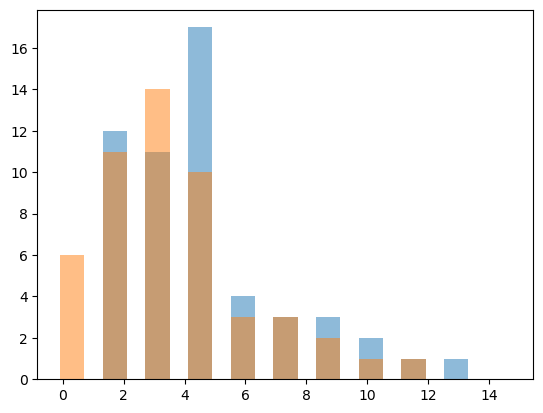

In [60]:
labels = targets["a"]
edges = np.histogram_bin_edges(labels, "auto")
bin_index_per_label = np.digitize(labels, edges)
emp_label_dist = np.bincount(bin_index_per_label, minlength=len(edges))
lds_kernel_window = get_lds_kernel_window(kernel="triang", ks=2, sigma=8)
eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

plt.bar(edges, emp_label_dist[:-1], alpha=0.5)
plt.bar(edges, eff_label_dist[:-1], alpha=0.5)
plt.show()